# Notebook to plot HNL constraints

This notebook runs through the process of getting the 0-th order constraints from T2K

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import interpolate

from matplotlib import rc, rcParams
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import pathos.multiprocessing as mp
from pathos.multiprocessing import ProcessingPool as Pool

from functools import partial

from particle import *
from particle import literals as lp

In [3]:
from HNL_MC import model
from HNL_MC import hnl_tools
from HNL_MC import plot_style
from HNL_MC import exp
from HNL_MC.const import *

# Neutrino fluxes 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: computer modern roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: computer modern roman


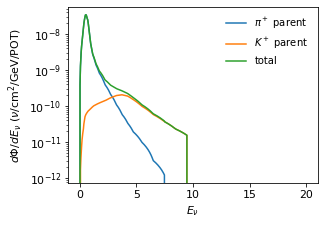

In [4]:
nd280fhc = exp.experiment(exp.ND280_FHC)
fpi = nd280fhc.get_flux_func(parent=lp.pi_plus)
fK = nd280fhc.get_flux_func(parent=lp.K_plus)

fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)

x=np.linspace(0,20,1000)
ax.plot(x,fpi(x), label='$\pi^+$ parent')
ax.plot(x,fK(x), label='$K^+$ parent')
ax.plot(x,fpi(x) + fK(x), label='total')

ax.set_xlabel(r"$E_\nu$")
ax.set_ylabel(r"$d\Phi/dE_\nu$ ($\nu$/cm$^2$/GeV/POT)")
ax.set_yscale('log')
ax.legend(loc='upper right', frameon=False)
ax.patch.set_facecolor('None')
fig.savefig("plots/nd280_FHC_nufluxes.png", dpi=400)

# Shrock Function

/Users/matheushostert/Repos/stdHNL/HNL_MC/const.py:158: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))
/Users/matheushostert/Repos/stdHNL/HNL_MC/const.py:158: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))
/Users/matheushostert/Repos/stdHNL/HNL_MC/const.py:158: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))


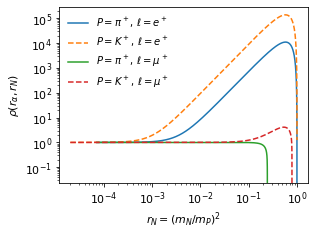

In [5]:
mN_K = np.logspace(-5,np.log10(lp.K_plus.mass/1e3),10000, endpoint=False)
mN_pi = np.logspace(-5,np.log10(lp.pi_plus.mass/1e3),10000, endpoint=False)

fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)

ax.plot(mN_pi/(lp.pi_plus.mass/1e3), hnl_tools.get_Rapp(mN_pi, parent = lp.pi_plus, daughter = lp.e_plus), label=r'$P=\pi^+,\,\ell=e^+$')
ax.plot(mN_K/(lp.K_plus.mass/1e3), hnl_tools.get_Rapp(mN_K, parent = lp.K_plus, daughter = lp.e_plus), label=r'$P=K^+,\,\ell=e^+$',ls='--')

ax.plot(mN_pi/(lp.pi_plus.mass/1e3), hnl_tools.get_Rapp(mN_pi, parent = lp.pi_plus, daughter = lp.mu_plus), label=r'$P=\pi^+,\,\ell=\mu^+$')
ax.plot(mN_K/(lp.K_plus.mass/1e3), hnl_tools.get_Rapp(mN_K, parent = lp.K_plus, daughter = lp.mu_plus), label=r'$P=K^+,\,\ell=\mu^+$',ls='--')

ax.set_ylabel(r"$\rho(r_\alpha,r_N)$")
ax.set_xlabel(r"$r_N=(m_N/m_P)^2$")
ax.set_yscale("log")
ax.set_xscale("log")
ax.legend(loc='upper left', frameon=False)
ax.patch.set_facecolor('None')
fig.savefig("plots/rho_function.png", dpi=400)

# Approximation for HNL flux

M_N = 0.15, T2K = 3e-09, Matheus = 2.5e-09, ratio = 0.85
M_N = 0.25, T2K = 8.5e-09, Matheus = 3.7e-09, ratio = 0.44


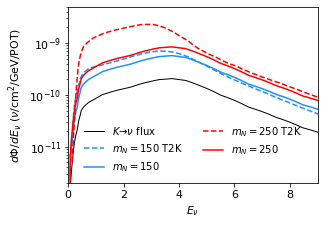

In [6]:
fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)
USQR = 1

x=np.linspace(0,10,1000)

#\nu 
ax.plot(x,fK(x), label=r'$K\to\nu$ flux', color= 'black', lw = 1)
# ax.plot(x,fK(x), label=r'$K^+$ parent', color='orange')

MN = 0.150

EN, flux = np.genfromtxt("digitized/T2K_HNL_fluxes/m4_150_MeV_KmuN.dat", unpack = True)
ax.plot(EN,USQR*flux/1e21, label=r'$m_N = 150$ T2K', ls='--', color='dodgerblue')

aux_dEN = np.array([2*EN[0] - EN[1]]+EN.tolist()+[2*EN[-1] - EN[-2]])
dEN = (aux_dEN[2:]-aux_dEN[:-2])/2

# phiN_pi = hnl_tools.dphi_dEN_app(fpi, x, Ualpha4SQR=USQR, mN=MN, parent=lp.pi_plus, daughter=lp.mu_plus)
phiN_K = hnl_tools.dphi_dEN_app(fK, x, Ualpha4SQR=USQR, mN=MN, parent=lp.K_plus, daughter=lp.mu_plus)
# ax.plot(x,phiN_pi, label=r'$\pi^+ \to \mu^+ N$', ls='--', color= 'dodgerblue')
ax.plot(x,phiN_K, label=r'$m_N = 150$', ls='-', color='dodgerblue')

print(f'M_N = {MN}, T2K = {USQR*(flux*dEN).sum()/1e21:.2g}, '+\
      f'Matheus = {(x[1]-x[0])*phiN_K.sum():.2g}, '+\
      f'ratio = {(x[1]-x[0])*phiN_K.sum()/(USQR*(flux*dEN).sum()/1e21):.2g}')

      
MN = 0.250

EN, flux = np.genfromtxt("digitized/T2K_HNL_fluxes/m4_250_MeV_KmuN.dat", unpack = True)
ax.plot(EN,USQR*flux/1e21, label=r'$m_N = 250$ T2K', ls='--', color='red')

aux_dEN = np.array([2*EN[0] - EN[1]]+EN.tolist()+[2*EN[-1] - EN[-2]])
dEN = (aux_dEN[2:]-aux_dEN[:-2])/2

# phiN_pi = hnl_tools.dphi_dEN_app(fpi, x, Ualpha4SQR=USQR, mN=MN, parent=lp.pi_plus, daughter=lp.mu_plus)
phiN_K = hnl_tools.dphi_dEN_app(fK, x, Ualpha4SQR=USQR, mN=MN, parent=lp.K_plus, daughter=lp.mu_plus)
# ax.plot(x,phiN_pi, label=r'$\pi^+ \to \mu^+ N$', ls='--', color= 'dodgerblue')
ax.plot(x,phiN_K, label=r'$m_N = 250$', ls='-', color='red')


print(f'M_N = {MN}, T2K = {USQR*(flux*dEN).sum()/1e21:.2g}, '+\
      f'Matheus = {(x[1]-x[0])*phiN_K.sum():.2g}, '+\
      f'ratio = {(x[1]-x[0])*phiN_K.sum()/(USQR*(flux*dEN).sum()/1e21):.2g}')

ax.set_xlabel(r"$E_\nu$")
ax.set_ylabel(r"$d\Phi/dE_\nu$ ($\nu$/cm$^2$/GeV/POT)")
ax.set_yscale('log')
ax.set_ylim(2e-12,5e-9)
ax.set_xlim(0,9)
ax.legend(loc='lower center', frameon=False, ncol=2)
ax.patch.set_facecolor('None')
fig.savefig("plots/HNL_fluxes_mN_150.png", dpi=400)

# Decay Rates

## Ue4 mixing only

No handles with labels found to put in legend.


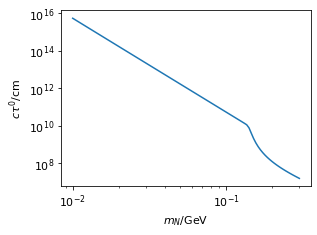

In [7]:
# Compute all the decay rates and branching ratios
M4=np.logspace(-2,np.log10(0.300),100)
USQR = 1e-6
ctaus=[]
for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings=[USQR,0, 0.0])
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    ctaus.append(my_hnl.ctau0)
ctaus=np.array(ctaus)

# Plotting
fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)

ax.plot(M4,ctaus)
 
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"$c\tau^0/$cm")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-5,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/lifetime_e-only.png", dpi=400)

In [8]:
# Compute all the decay rates and branching ratios
M4=np.logspace(-2,np.log10(0.4),100)
USQR = 1e-2

list_of_channels = ['nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings=[USQR,0.0, 0.0])
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: computer modern roman


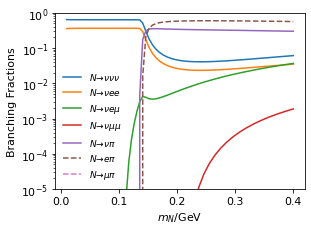

In [9]:
fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi')
    
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-5,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_e-only.png", dpi=400)

## Umu4

In [206]:
my_hnl = model.hnl_model(m4=0.350, mixings=[0.0,1.0, 0.0])
my_hnl.set_high_level_variables()
my_hnl.compute_rates()
print(my_hnl.ctau0,my_hnl.rates['nu_pi'])

5.497134937554365 1.4211521571625421e-15


In [207]:
# Compute all the decay rates and branching ratios
M4=np.logspace(-2,np.log10(0.300),100)
USQR = 1e-4
ctaus=[]
for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings=[0.0,USQR, 0.0])
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    ctaus.append(my_hnl.ctau0)
ctaus=np.array(ctaus)

No handles with labels found to put in legend.


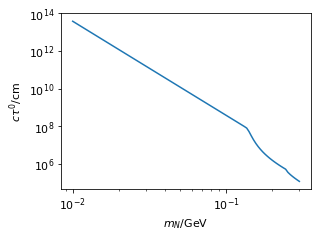

In [208]:
fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)

ax.plot(M4,ctaus)
 
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"$c\tau^0/$cm")
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-5,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/lifetime_mu-only.png", dpi=400)

In [180]:
# Compute all the decay rates and branching ratios
M4=np.logspace(-2,np.log10(0.300),200)
USQR = 1e-2

list_of_channels = ['nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings=[0.0,USQR, 0.0])
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

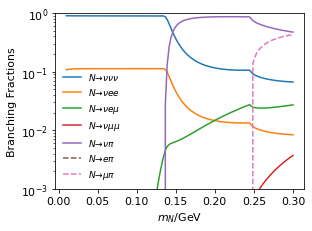

In [181]:
fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi')
    
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-3,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_mu-only.png", dpi=400)

# Turning on the dipole at the top tip of the Supernova bound

In [14]:
# Compute all the decay rates and branching ratios
M4=np.linspace(0.15,0.4,1000)
USQR = 1e-4
dmu4 = 5e-7 # GeV^-1

list_of_channels = ['nu_gamma','nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings=[0.0,USQR, 0.0], dipoles=[0.0, dmu4, 0.0], GX= 0*Gf)
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

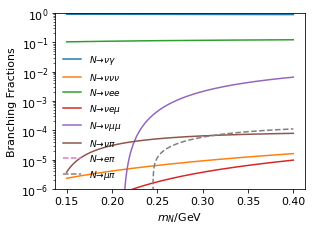

In [15]:
fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi').replace("gamma", '\\gamma')
    
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_mudipole.png", dpi=400)

# Now turning on the dark Z'

In [124]:
# Compute all the decay rates and branching ratios
M4=np.linspace(0.15,0.4,1000)
USQR = 1e-4

list_of_channels = ['nu_gamma','nu_nu_nu','nu_e_e','nu_e_mu','nu_mu_mu','nu_pi','e_pi','mu_pi']
all_brs = np.empty((len(list_of_channels),len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings=[0.0,USQR, 0.0], dipoles=[0.0, 0.0, 0.0], GX= 100*Gf)
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for channel in list_of_channels:
        i = list_of_channels.index(channel)
        
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
        else:
            all_brs[i,j] = 0.0

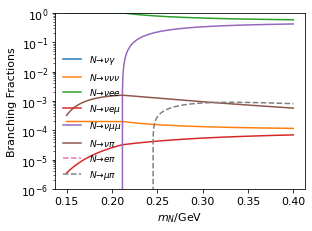

In [125]:
fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)

for channel in list_of_channels:
    i = list_of_channels.index(channel)
    label=f'$N\\to {channel}$'.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi').replace("gamma", '\\gamma')
    
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.legend(loc='lower left', frameon=False, ncol=1,fontsize=9)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_mu_Gx.png", dpi=400)

# Compute number of decays in TPCs

In [160]:
# tests
rate_d=[]
rate_gx=[]
for d in np.logspace(-12,-3,100):
    rate_d.append(hnl_tools.get_event_rate((0.1, 1e-6), flavor_struct=[0.0,1.0,0.0], dipoles=[0.0,d,0.0], GX=0, exp_setup=exp.ND280_FHC))
for gx in np.logspace(-1,4,100):
    rate_gx.append(hnl_tools.get_event_rate((0.1, 1e-6), flavor_struct=[0.0,1.0,0.0], dipoles=[0.0,0.0,0.0], GX=gx*Gf, exp_setup=exp.ND280_FHC))


(1e-14, 10000000000.0)

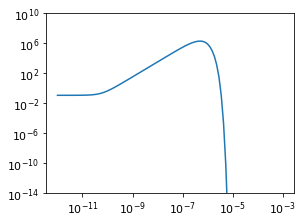

In [161]:
plt.loglog(np.logspace(-12,-3,100), rate_d)
plt.ylim(1e-14,1e10)

(1e-14, 10000000000.0)

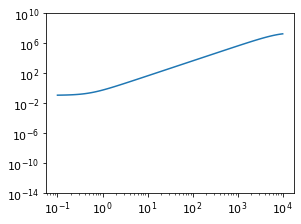

In [162]:
plt.loglog(np.logspace(-1,4,100), rate_gx)
plt.ylim(1e-14,1e10)

## Batch computation

In [89]:
# grid of mix vs mass
gridx = 40
gridy = 40

M4 = np.linspace(0.02,0.388, gridx)
USQR = np.logspace(-14,-3, gridy) 
X,Y = np.meshgrid(M4,USQR)
m4_grid, usqr_grid = X.flatten(), Y.flatten()

# define non-scan parameters


tot_cores = mp.cpu_count()
pool = Pool(tot_cores)
############

dipoles = [0,0,0]
GX = 0.0
get_event_partial = partial(hnl_tools.get_event_rate, flavor_struct=[0.0,1.0,0.0], dipoles=dipoles, GX=GX, exp_setup = exp.ND280_FHC)
event_rate_weak = pool.map(get_event_partial, ((m4, usqr) for m4, usqr in zip(m4_grid, usqr_grid)))
get_lifetime_partial = partial(hnl_tools.get_lifetime, flavor_struct=[0.0,1.0,0.0], dipoles=dipoles, GX=GX)
lifetime_weak = pool.map(get_lifetime_partial, ((m4, usqr) for m4, usqr in zip(m4_grid, usqr_grid)))

dipoles = [0,1e-8,0]
GX = 0.0
get_event_partial = partial(hnl_tools.get_event_rate, flavor_struct=[0.0,1.0,0.0], dipoles=dipoles, GX=GX, exp_setup = exp.ND280_FHC)
event_rate_dipole = pool.map(get_event_partial, ((m4, usqr) for m4, usqr in zip(m4_grid, usqr_grid)))
get_lifetime_partial = partial(hnl_tools.get_lifetime, flavor_struct=[0.0,1.0,0.0], dipoles=dipoles, GX=GX)
lifetime_dipole = pool.map(get_lifetime_partial, ((m4, usqr) for m4, usqr in zip(m4_grid, usqr_grid)))

dipoles = [0,0,0]
GX = Gf*10
get_event_partial = partial(hnl_tools.get_event_rate, flavor_struct=[0.0,1.0,0.0], dipoles=dipoles, GX=GX, exp_setup = exp.ND280_FHC)
event_rate_darknus = pool.map(get_event_partial, ((m4, usqr) for m4, usqr in zip(m4_grid, usqr_grid)))
get_lifetime_partial = partial(hnl_tools.get_lifetime, flavor_struct=[0.0,1.0,0.0], dipoles=dipoles, GX=GX)
lifetime_darknus = pool.map(get_lifetime_partial, ((m4, usqr) for m4, usqr in zip(m4_grid, usqr_grid)))

############
pool.terminate()
pool.restart()

<multiprocess.pool.Pool state=RUN pool_size=8>

In [239]:
hnl_tools.get_lifetime((1,1e-5), flavor_struct=[0,0,1])*c_LIGHT/100/1e3*100

12.435216196001296

<ipython-input-169-4868fb6a995e>:27: UserWarning: No contour levels were found within the data range.
  level_1 = ax.contour(Xi, Yi, Zi, levels = [0.023*c_LIGHT], colors=['None'], linestyles=['--']) #NEW CONSTRAINT


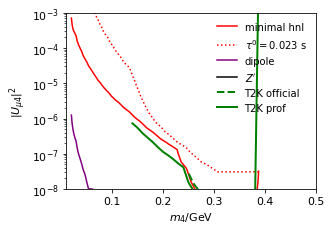

In [169]:
fig = plt.figure()
ax = fig.add_axes(plot_style.axes_form)
ax.patch.set_facecolor('None')

# our T2K bound -- Weak Interaction only
Xi,Yi,Zi=plot_style.interp_grid(x=m4_grid, y=usqr_grid , z=event_rate_weak, fine_gridx=gridx, fine_gridy=gridy, log=True)
# get contour x and y
# _ = ax.contourf(Xi, Yi, Zi, levels = [2.3,1e100], colors=['lightblue']) #NEW CONSTRAINT
level_0 = ax.contour(Xi, Yi, Zi, levels = [2.3], colors=['None']) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.plot(bound[:,0],bound[:,1], c='red', label=r'minimal hnl')

Xi,Yi,Zi=plot_style.interp_grid(x=m4_grid, y=usqr_grid , z=lifetime_weak, fine_gridx=gridx, fine_gridy=gridy, log=True)
level_1 = ax.contour(Xi, Yi, Zi, levels = [0.023*c_LIGHT], colors=['None'], linestyles=['--']) #NEW CONSTRAINT
bound = level_1.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.plot(bound[:,0],bound[:,1], c='red', ls=':', label=r'$\tau^0 = 0.023$ s')

# our T2K bound -- Weak Interaction only
Xi,Yi,Zi=plot_style.interp_grid(x=m4_grid, y=usqr_grid , z=event_rate_dipole, fine_gridx=gridx, fine_gridy=gridy, log=True)
# get contour x and y
# _ = ax.contourf(Xi, Yi, Zi, levels = [2.3,1e100], colors=['purple']) #NEW CONSTRAINT
level_0 = ax.contour(Xi, Yi, Zi, levels = [2.3], colors=['None']) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.plot(bound[:,0],bound[:,1], c='purple', label=r'dipole')

Xi,Yi,Zi=plot_style.interp_grid(x=m4_grid, y=usqr_grid , z=lifetime_dipole, fine_gridx=gridx, fine_gridy=gridy, log=True)
level_1 = ax.contour(Xi, Yi, Zi, levels = [0.023*c_LIGHT], colors=['None'], linestyles=['--']) #NEW CONSTRAINT
bound = level_1.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.plot(bound[:,0],bound[:,1], c='purple', ls=':')

# our T2K bound -- Weak Interaction only
Xi,Yi,Zi=plot_style.interp_grid(x=m4_grid, y=usqr_grid , z=event_rate_darknus, fine_gridx=gridx, fine_gridy=gridy, log=True)
# get contour x and y
# _ = ax.contourf(Xi, Yi, Zi, levels = [2.3,1e100], colors=['purple']) #NEW CONSTRAINT
level_0 = ax.contour(Xi, Yi, Zi, levels = [2.3], colors=['None']) #NEW CONSTRAINT
bound = level_0.collections[0].get_paths()[0].vertices  #grab the coords of the bound
ax.plot(bound[:,0],bound[:,1], c='black', label=r'$Z^\prime$')

Xi,Yi,Zi=plot_style.interp_grid(x=m4_grid, y=usqr_grid , z=lifetime_darknus, fine_gridx=gridx, fine_gridy=gridy, log=True)
# level_1 = ax.contour(Xi, Yi, np.log(Zi), levels = 10, colors=['black'], linestyles=['--']) #NEW CONSTRAINT
# bound = level_1.collections[0].get_paths()[0].vertices  #grab the coords of the bound
# ax.plot(bound[:,0],bound[:,1], c='black', ls=':')


# Kelly Machado 
# mbound,ubound = np.genfromtxt('digitized/muboone_kelly_machado/PS_eff_scalar.dat',unpack=True)
# plt.plot(mbound/1e3,ubound, c='green', lw=2, ls='-', label='$\mu$BooNE')
# mbound,ubound = np.genfromtxt('digitized/muboone_kelly_machado/PS_eff_avg.dat',unpack=True)
# plt.plot(mbound/1e3,ubound, c='green', lw=2, ls='--', label='Kelly \& Machado')

# Kusenko
# mbound,ubound = np.genfromtxt('digitized/Kusenko/Umu4_v2.dat',unpack=True)
# plt.plot(mbound/1e3,ubound, c='orange', lw=2, ls='-', label='PS191')

# T2K bound
mbound,ubound = np.genfromtxt('digitized/T2K_2019/T2K_2019_mu.dat',unpack=True)
# plt.plot(mbound/1e3,ubound, c='green', lw=2, label='T2K official')
mbound,ubound = np.genfromtxt('digitized/T2K_2019/T2K_2019_mu_single_channel.dat',unpack=True)
plt.plot(mbound/1e3,ubound, c='green', lw=2, ls='--', label='T2K official')

m4, ue4, Umu4 = np.genfromtxt('limits_profiling.dat', unpack=True)
plt.plot(m4/1e3,Umu4, c='green', lw=2, ls='-', label='T2K prof')

ax.set_yscale("log")
# ax.set_xscale("log")

ax.set_ylabel("$|U_{\mu 4}|^2$")
ax.set_xlabel("$m_4/$GeV")

ax.legend(loc='upper right', frameon=False, ncol=1)
ax.set_ylim(1e-8,1e-3)
ax.set_xlim(10e-3,0.5)
fig.savefig('plots/T2K_bound.png',dpi=400)

In [23]:
# Main plot for Muons

NameError: name 'umu4' is not defined

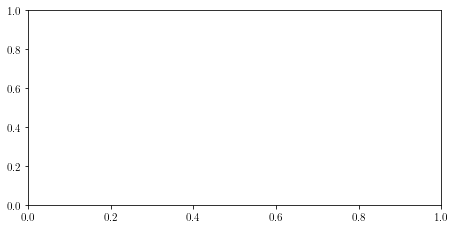

In [24]:
def plot_lines(flavor, save=False, invisible=False, m4min=1e-3,m4max=1e2, units = 1):
    fsize = 11
    rc('text', usetex=True)
    params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
                    'figure.figsize':(2*3.375,1.5*2.375)	}
    rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
    rcParams.update(params)
    axes_form  = [0.1,0.16,0.85,0.76]


    fig = plt.figure()
    ax = fig.add_axes(axes_form)


    #############
    # get bounds
    list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=m4min, m4max=m4max)

    for key in list_of_bounds.keys():
        MN,usqr_bound = list_of_bounds[key]
        ##############################################
        # Constraints on U\alpha4^2
#         ax.plot(MN*units, usqr_bound, label=fr"{key.split('_')[0]}")
        ax.fill_between(MN*units, usqr_bound, np.ones(np.size(MN)), 
                        fc='lightgrey', ec='None', lw =0.0, alpha=0.5)



    ax.set_xlim(m4min*units,m4max*units)
    ax.set_ylim(1e-9,2e-2)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(label[flavor])
    ax.set_xlabel(r"$m_{N}$/MeV")
    ax.set_yticks([1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2])
    ax.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.2)
    if save:
        fig.savefig('plots/u'+flavor+'4.pdf')
    return ax, fig

axmu, figmu = plot_lines('mu',m4min=0.02,m4max=0.2,units=1e3)

x = np.logspace(np.log10(20),np.log10(200), 1000)

##
this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
units = 1
f = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=None, assume_sorted=False)    
axmu.plot(x, f(x), c='black', ls='-', label='Kelly \& Machado 1')

##
this_file = 'digitized/muboone_kelly_machado/PS_eff_scalar.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
units = 1
f = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=None, assume_sorted=False)    
axmu.plot(x, f(x), c='black', ls='--', label='Kelly \& Machado 2')


##
this_file = 'Nlimits/digitized/PS-191/UeUmu_K.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
fK = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=1, assume_sorted=False)    

this_file = 'Nlimits/digitized/PS-191/UeUmu_pi.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
fpi = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=1, assume_sorted=False)    

gL = -1/2 + 0.223
gR = 0.22343
scaling = np.sqrt(gL**2 +gR**2 + gR*gL)
combined = np.amin([fK(x),fpi(x)],axis=0)

NBAKGS = 30**2
lower_line = combined/scaling
upper_line = combined/scaling*np.sqrt(np.sqrt(NBAKGS)/2.3)

axmu.fill_between(x, lower_line, upper_line, color='lightblue', lw=0.0)
axmu.plot(x, lower_line, color='dodgerblue', ls='-', label=fr'my PS-191 $N_{{\rm bkg}}=0$')
axmu.plot(x, upper_line, color='dodgerblue', ls='--', label=fr'my PS-191 $N_{{\rm sig}}={np.sqrt(NBAKGS)}$')




list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)

MN,usqr_bound = list_of_bounds['kusenko_all_v2']
axmu.plot(MN*1e3, usqr_bound, color = 'red', label=fr"PS-191 Kusenko")

##
# this_file = 'digitized/NA62/NA62.dat'
# m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
# axmu.plot(m4*1e3, Umu4sq, c='blue', ls='--', label='NA62 (future)')


axmu.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$",fontsize=10)
axmu.legend(loc='lower left', frameon=False, ncol=3)


figmu.patch.set_visible(False)
figmu.savefig('plots/mu4.png',dpi=400)

In [274]:
fpi = np.genfromtxt("fluxes/ps191/pi_Uu.dat")
fKp = np.genfromtxt("fluxes/ps191/Kplus_Uu.dat")
fKm = np.genfromtxt("fluxes/ps191/Kminus_Uu.dat")

my_e, my_numu = np.genfromtxt("fluxes/ps191/numu_flux.dat", unpack=True)

No handles with labels found to put in legend.


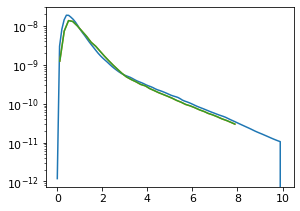

In [282]:
# plt.plot(ep, fpi, label='fpi')
# plt.plot(ep, fKp, label='fKp')
# plt.plot(ep, fKm, label='fKm')

plt.plot(ep, fpi+fKp+fKm)
norm = 1/0.89e20/4000
plt.plot(my_e, my_numu*norm)
plt.plot(my_e, my_numu*norm)


plt.legend(loc='upper right', frameon=False)
plt.yscale("log")

In [269]:
dE = 0.1
index = int(np.floor(E/dE))
print(index)
ans = f[index] + ((E - dE*index)/dE)*(f[index+1]-f[index])

ep = np.linspace(0,len(fKp)*0.1, len(fKp))
# ans = list[floor(E/0.1)] + ((E - 0.1*floor(E/0.1))/0.1)*(list[floor(E/0.1)+1]-list[floor(E/0.1)]);


20
